In [48]:
#!pip install opencv-python
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [52]:
images = []
def load_images_from_folder(folder):
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder="E:\dominant colour extraction\dominant_color_extraction-master\dataset"

load_images_from_folder(folder)

[array([[[141, 144, 146],
         [131, 137, 138],
         [122, 130, 131],
         ...,
         [129, 124, 119],
         [177, 172, 166],
         [ 61,  57,  53]],
 
        [[132, 134, 135],
         [141, 144, 145],
         [120, 125, 125],
         ...,
         [125, 118, 116],
         [176, 169, 166],
         [ 66,  60,  59]],
 
        [[118, 120, 121],
         [137, 140, 139],
         [120, 122, 122],
         ...,
         [134, 128, 125],
         [203, 197, 195],
         [ 60,  54,  53]],
 
        ...,
 
        [[153, 145, 142],
         [168, 160, 157],
         [159, 151, 147],
         ...,
         [177, 185, 170],
         [228, 234, 223],
         [ 54,  57,  51]],
 
        [[141, 133, 129],
         [160, 152, 147],
         [164, 156, 152],
         ...,
         [170, 171, 162],
         [204, 205, 196],
         [ 53,  54,  46]],
 
        [[164, 157, 152],
         [139, 131, 125],
         [176, 169, 164],
         ...,
         [133, 133, 126],
  

In [50]:
'''img = cv2.imread("0029.png")#Reads an image into BGR Format
img2= cv2.imread("0027.png")
img3= cv2.imread("0028.png")
img4= cv2.imread("0029.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)'''


'img = cv2.imread("0029.png")#Reads an image into BGR Format\nimg2= cv2.imread("0027.png")\nimg3= cv2.imread("0028.png")\nimg4= cv2.imread("0029.png")\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg4 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)'

In [84]:
# Flatten Each channel of the Image
c_img = images.copy()
print(type(c_img))
for i in range(0,len(c_img)-1):
    c_img[i]=np.reshape(c_img[i],(-1,3))
# c_img = np.reshape(c_img, (-1,3))
#print(type(c_img))
c_img[:10]

<class 'list'>
<class 'list'>


[array([[141, 144, 146],
        [131, 137, 138],
        [122, 130, 131],
        ...,
        [133, 133, 126],
        [195, 195, 187],
        [ 60,  61,  55]], dtype=uint8),
 array([[ 77,  79,  75],
        [ 89,  91,  86],
        [120, 122, 118],
        ...,
        [250, 240, 217],
        [255, 250, 230],
        [255, 250, 233]], dtype=uint8),
 array([[156, 184, 179],
        [156, 188, 179],
        [ 82, 112, 103],
        ...,
        [179, 171, 156],
        [178, 168, 154],
        [175, 164, 151]], dtype=uint8),
 array([[ 43,  95, 151],
        [ 98, 159, 212],
        [170, 232, 255],
        ...,
        [172, 163, 155],
        [154, 145, 137],
        [157, 148, 142]], dtype=uint8),
 array([[[171, 174, 168],
         [ 77,  80,  77],
         [ 62,  66,  63],
         ...,
         [159, 160, 158],
         [152, 153, 151],
         [125, 126, 123]],
 
        [[167, 171, 166],
         [ 79,  84,  80],
         [ 62,  66,  63],
         ...,
         [134, 135, 133

In [85]:
kmeans = KMeans(n_clusters=7,random_state=2)

In [87]:
for i in range(0,len(c_img)-1):
    print(kmeans.fit_predict(c_img[i]))


[6 6 6 ... 6 0 1]
[0 5 2 ... 3 3 3]
[5 5 4 ... 5 5 5]
[3 0 2 ... 6 6 6]


In [55]:

#kmeans.fit_predict(c_img)

array([5, 4, 4, ..., 5, 5, 4])

In [56]:
centers = kmeans.cluster_centers_.astype(int)

print (centers)

[[189 190 183]
 [ 37  36  34]
 [100 100  97]
 [242 241 232]
 [131 130 125]
 [158 155 151]
 [ 68  64  63]]


In [57]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.10065625 0.21346875 0.125625   0.04579687 0.19346875 0.1840625
 0.13692187]


In [58]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.21346875, array([37, 36, 34])], [0.19346875, array([131, 130, 125])], [0.1840625, array([158, 155, 151])], [0.13692187, array([68, 64, 63])], [0.125625, array([100, 100,  97])], [0.10065625, array([189, 190, 183])], [0.045796875, array([242, 241, 232])]]


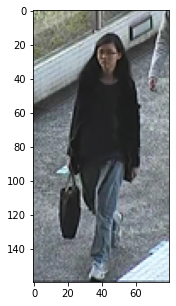

(160, 80, 3)


In [60]:
plt.figure(figsize=(5,5))
plt.imshow(img)# as RGB Format
plt.show()
print (img.shape)

### Plotting what all colors are these :

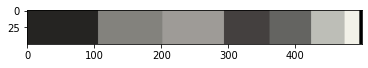

In [61]:
color_p = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()